In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%run util.py
pwd = os.getcwd()

In [2]:
key_soft,key_class = get_curr_mpi_dict()
osu_ver = 'v5.6.2'
trials  = 20

In [3]:
bw_mean     = np.zeros((23,len(key_soft)))
bw_std      = np.zeros((23,len(key_soft)))
lt_mean     = np.zeros((23,len(key_soft)))
lt_std      = np.zeros((23,len(key_soft)))
failed_runs   = []
failed_reason = {}

In [4]:
for i in np.arange(1,len(key_soft)+1):
    prefix = pwd+'/curr_mpi_bench/osu-micro-benchmarks-5.6.2/build.'
    loc = prefix+key_soft[i]+'/mpi/one-sided'
    if os.path.isdir(loc):
        BW = get_BW_dset(loc,osu_ver,trials)
        bw_mean[:,i-1] = np.mean(BW,axis=1)
        bw_std[:,i-1]  = np.std(BW,axis=1)

        LT = get_LT_dset(loc,osu_ver,trials)
        lt_mean[:,i-1] = np.mean(LT,axis=1)
        lt_std[:,i-1]  = np.std(LT,axis=1)
        
        if np.allclose(bw_mean[:,i-1],np.zeros(23))\
        or np.allclose(lt_mean[:,i-1],np.zeros(23)):
            failed_runs.append(i)
            failed_reason[i] = 'runtime-error'
    else:
        failed_runs.append(i)
        failed_reason[i] = 'compile-error'
os.chdir(pwd)

In [5]:
def plot_bw_lt(list_runs,ax_lt,ax_bw,legend_loc=(1.65,0.7),legend_col=1):
    for i in list_runs:
        if i in failed_runs :
            pass
        else :
            _x = bw_key
            ax_lt.errorbar(_x, lt_mean[:,i-1],lt_std[:,i-1],
                         fmt='--.',markersize=2,elinewidth=2,capsize=2)
            ax_lt.set_yscale('log')
            ax_lt.set_xscale('log')
            ax_lt.set_ylim((10**-2,10**5))
            ax_lt.set_xlabel('message size in log-bytes',size=12.5);
            ax_lt.set_ylabel('latency in usec',size=12.5);

            _x = lt_key
            ax_bw.errorbar(_x, bw_mean[:,i-1],bw_std[:,i-1],
                          label=key_soft[i],
                         fmt='--.',markersize=2,elinewidth=2,capsize=2)
            ax_bw.set_yscale('log')
            ax_bw.set_xscale('log')
            ax_bw.set_ylim((10**-1,10**5))
            ax_bw.set_xlabel('message size in bytes',size=12.5);
            ax_bw.set_ylabel('bandwidth in MB/s',size=12.5);
            ax_bw.yaxis.set_label_position("right")
            ax_bw.yaxis.tick_right()
            ax_bw.legend(bbox_to_anchor=legend_loc,ncol=legend_col,prop={'size': 10})

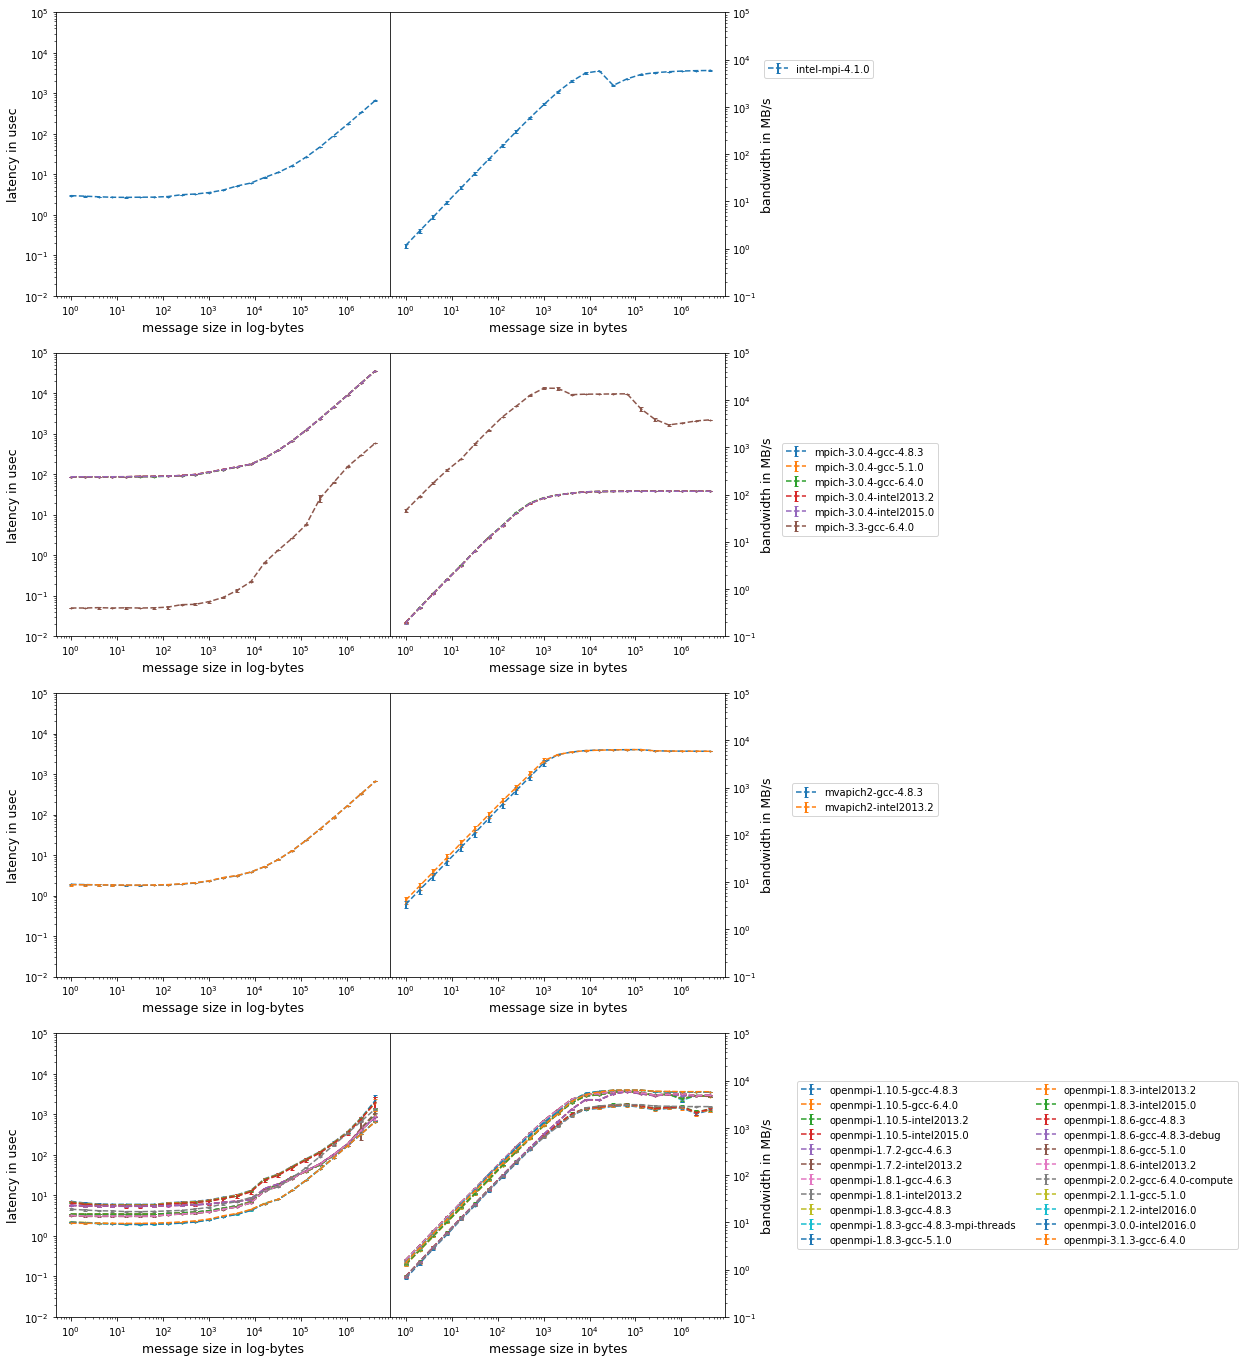

In [6]:
plt.rcParams["figure.figsize"] = (12,24)

f,axarr = plt.subplots(4,2)

for i in range(1,len(key_soft)+1):
    if key_class[i]=='intel':
        plot_bw_lt([i],axarr[0,0],axarr[0,1],legend_loc=(1.1,0.85))
    if key_class[i]=='mpich':
        plot_bw_lt([i],axarr[1,0],axarr[1,1])
    if key_class[i]=='mvapich2':
        plot_bw_lt([i],axarr[2,0],axarr[2,1])
    if key_class[i]=='openmpi':
        plot_bw_lt([i],axarr[3,0],axarr[3,1],legend_loc=(1.2,0.85),legend_col=2)

#f.text(0.0, 0.5, 'common xlabel', ha='center', va='center',rotation='vertical',size=12)
#f.text(1.0, 0.5, 'common xlabel', ha='center', va='center',rotation='vertical',size=12)

plt.subplots_adjust(hspace = 0.2, wspace = 0, right=0.9)
f.savefig("curr_mpi.png",dpi=100)


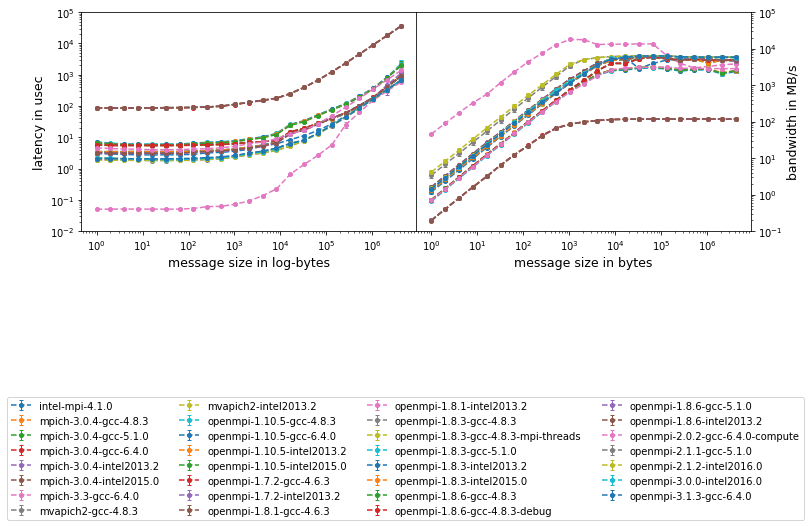

In [7]:
plt.rcParams["figure.figsize"] = (12,8)
f,(ax1,ax2) = plt.subplots(1,2)

for i in range(1,len(key_soft)+1):
    if i in failed_runs :
        pass
    else :
        _x = bw_key
        ax1.errorbar(_x, lt_mean[:,i-1],lt_std[:,i-1],
                     fmt='--o',markersize=4,elinewidth=1,capsize=2)
        ax1.set_yscale('log')
        ax1.set_xscale('log')
        ax1.set_ylim((10**-2,10**5))
        ax1.set_xlabel('message size in log-bytes',size=12.5);
        ax1.set_ylabel('latency in usec',size=12.5);

        _x = lt_key
        ax2.errorbar(_x, bw_mean[:,i-1],bw_std[:,i-1],
                     label=key_soft[i],
                     fmt='--o',markersize=4,elinewidth=1,capsize=2)
        ax2.yaxis.set_label_position("right")
        ax2.yaxis.tick_right()    
        ax2.set_yscale('log')
        ax2.set_xscale('log')
        ax2.set_ylim((10**-1,10**5))
        ax2.set_xlabel('message size in bytes',size=12.5);
        ax2.set_ylabel('bandwidth in MB/s',size=12.5);

    
handles, labels = ax2.get_legend_handles_labels()  
f.legend(bbox_to_anchor=(0.5,-0.01), loc="lower center", 
         bbox_transform=plt.gcf().transFigure,ncol=4)
plt.subplots_adjust(hspace = 0.2, wspace = 0, bottom=0.5)
f.savefig("curr_mpi_combined.png",dpi=100)

In [8]:
!mv curr_mpi.png plots/
!mv curr_mpi_combined.png plots/

In [9]:
for i in failed_runs:
    print(key_soft[i], ':',  failed_reason[i])

intel-mpi-4.0.3 : runtime-error
intel-mpi-5.1.3.258 : compile-error
mpich-3.0.4-gcc-4.6.3 : runtime-error
mvapich2-gcc-4.8.3-cuda8 : compile-error
openmpi-1.10.5-intel2016.0 : compile-error
openmpi-1.6.3-gcc-4.6.3 : compile-error
openmpi-1.6.3-gcc-4.8.3 : compile-error
openmpi-1.6.3-intel2011.3 : compile-error
openmpi-1.6.3-intel2013.2 : compile-error
openmpi-1.6.5-gcc-4.6.3 : compile-error
openmpi-1.6.5-gcc-4.8.3 : compile-error
openmpi-1.6.5-intel2013.2 : compile-error
